In [1]:
#importing the required libraries for the process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_curve,roc_auc_score

In [2]:
#importing the dataset
q1=pd.read_excel('/content/drive/MyDrive/Axtria/Physician_activity_over_past_10_quarters.xlsx')
train=pd.DataFrame(q1)
train.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
0,1,201802,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1,201803,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,1,201804,1,8,8,0,0,0,0,0,1,24,13,17,23,46,15,0,0,0,0,1,1,109,19,NaN
3,1,201901,1,11,24,0,0,0,0,0,1,50,26,29,36,90,29,0,0,0,0,1,1,204,18,NaN
4,1,201902,1,15,44,0,0,0,0,0,1,49,18,30,32,73,35,0,0,0,0,1,1,180,37,NaN


Data Pre-Processing

In [3]:
#checking the shape
train.shape

(100000, 26)

In [4]:
#checking for null data
train.isnull().sum()

physician_id                                        0
year_quarter                                        0
brand_prescribed                                    0
total_representative_visits                         0
total_sample_dropped                                0
saving_cards_dropped                                0
vouchers_dropped                                    0
total_seminar_as_attendee                           0
total_seminar_as_speaker                            0
physician_hospital_affiliation                      0
physician_in_group_practice                         0
total_prescriptions_for_indication1                 0
total_prescriptions_for_indication2                 0
total_prescriptions_for_indication3                 0
total_patient_with_commercial_insurance_plan        0
total_patient_with_medicare_insurance_plan          0
total_patient_with_medicaid_insurance_plan          0
brand_web_impressions                               0
brand_ehr_impressions       

In [5]:
#feature information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   physician_id                                  100000 non-null  int64 
 1   year_quarter                                  100000 non-null  int64 
 2   brand_prescribed                              100000 non-null  int64 
 3   total_representative_visits                   100000 non-null  int64 
 4   total_sample_dropped                          100000 non-null  int64 
 5   saving_cards_dropped                          100000 non-null  int64 
 6   vouchers_dropped                              100000 non-null  int64 
 7   total_seminar_as_attendee                     100000 non-null  int64 
 8   total_seminar_as_speaker                      100000 non-null  int64 
 9   physician_hospital_affiliation                100000 non-nul

In [6]:
#from info,we get we have one column which has high number of null values(more than 50 percent,lets drop it first)
train.drop(['physician_segment'],axis=1,inplace=True)

In [7]:
#dropping year_quarter column as it not adding any value
train.drop(['year_quarter'],axis=1,inplace=True)

Visualising the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


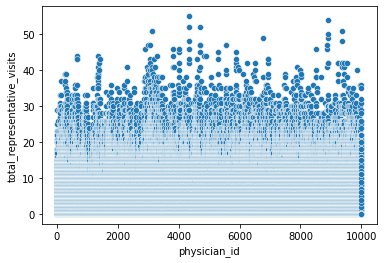

In [8]:
sns.scatterplot(train['physician_id'],train['total_representative_visits'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


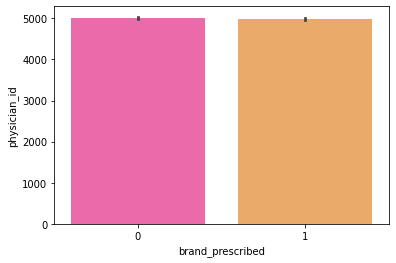

In [9]:
sns.barplot(train['brand_prescribed'],train['physician_id'],palette='spring')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


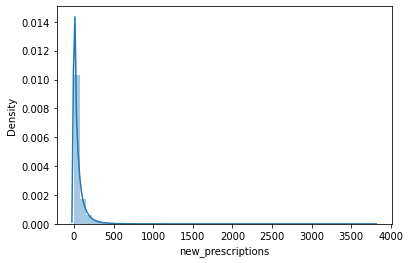

In [10]:
sns.distplot(train['new_prescriptions'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


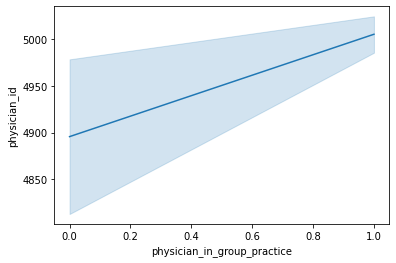

In [11]:
sns.lineplot(train['physician_in_group_practice'],train['physician_id'])

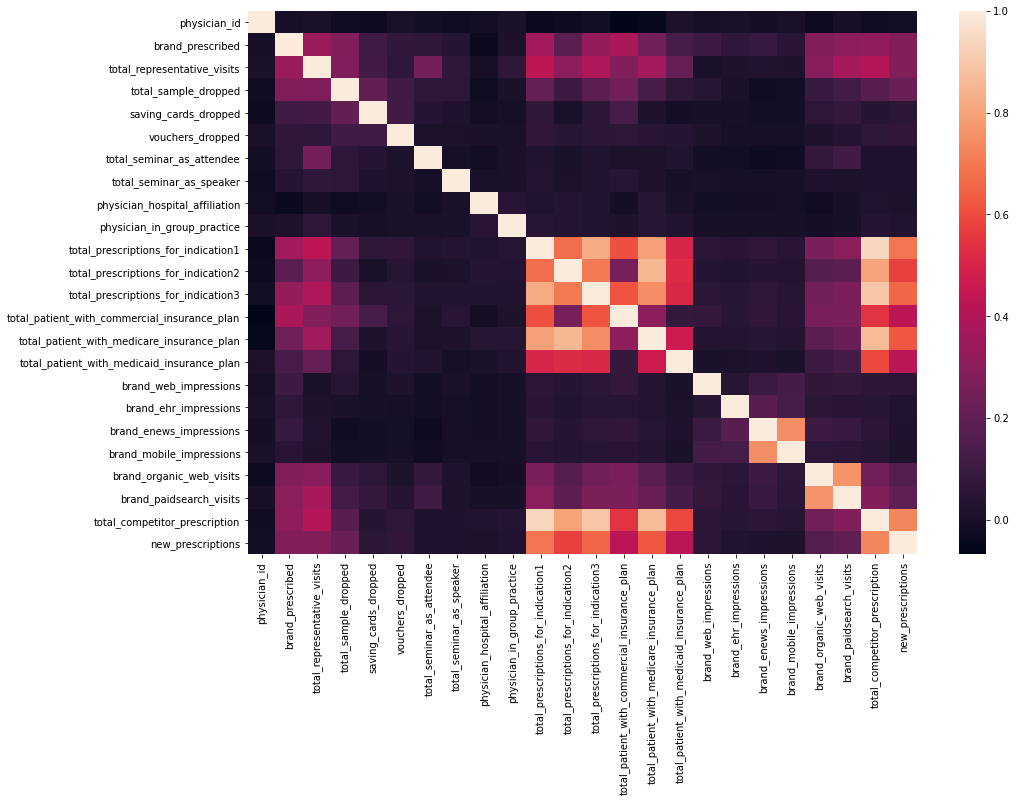

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

Feature Engineering

In [13]:
#checking the skewness of data
train.skew()

physician_id                                     0.000000
brand_prescribed                                 0.185394
total_representative_visits                      1.147292
total_sample_dropped                            10.364840
saving_cards_dropped                            10.308719
vouchers_dropped                                29.408580
total_seminar_as_attendee                        3.564893
total_seminar_as_speaker                        46.113569
physician_hospital_affiliation                   1.621638
physician_in_group_practice                     -4.579050
total_prescriptions_for_indication1              3.197163
total_prescriptions_for_indication2              6.339249
total_prescriptions_for_indication3              5.512469
total_patient_with_commercial_insurance_plan     3.242671
total_patient_with_medicare_insurance_plan       4.624609
total_patient_with_medicaid_insurance_plan       6.362826
brand_web_impressions                           40.896680
brand_ehr_impr

In [14]:
#adjusting for skewed values
for index in train.skew().index:
    if train.skew().loc[index]>0.5:
        train[index]=np.log1p(train[index])
    if train.skew().loc[index]<-0.5:
        train[index]=np.square(train[index])

In [15]:
#getting statistical summary of the given data
train.describe()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5000.500000,0.453850,4.045636,1.189203,0.198707,0.040010,0.088722,0.013452,0.128302,0.958200,15.121210,2.712398,15.038614,14.522316,14.997320,1.806495,0.604615,0.362679,0.127616,0.158797,0.842560,0.901500,26.544630,2.750854
std,2886.765765,0.497868,3.064092,1.421751,0.601401,0.261042,0.249687,0.147529,0.269205,0.200133,9.708218,1.749193,10.058089,10.267338,11.867606,1.953922,0.740419,0.698141,0.294143,0.363718,0.364217,0.297991,15.904555,1.843625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.750000,0.000000,1.206949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.669721,1.386294,7.687248,5.749902,3.210402,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.170440,1.098612
50%,5000.500000,0.000000,3.786566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.487197,2.995732,16.203456,15.303924,14.658495,1.386294,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,29.899682,3.178054
75%,7500.250000,1.000000,6.174761,2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.094516,4.077537,22.348196,22.179675,24.134178,3.367296,1.098612,0.693147,0.000000,0.000000,1.000000,1.000000,38.012377,4.204693
max,10000.000000,1.000000,16.203456,7.239215,4.948760,4.762174,2.197225,4.499810,0.693147,1.000000,60.829757,7.983781,68.658085,58.590501,71.660764,8.014666,6.350886,6.709304,3.891820,4.948760,1.000000,1.000000,83.301376,8.240385


Some of the feature here have outliers,so lets first try to adjust them

In [16]:
#importing zscore for outliers removal
from scipy.stats import zscore
z=np.abs(zscore(train))
train_new=train[(z<3).all(axis=1)]
train_new.shape

(74036, 24)

In [17]:
train.shape

(100000, 24)

There is huge diffrence in shape after applying zscore,so lets select it as a final dataset

In [18]:
train=train_new

In [19]:
#getting the data overview now
train.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions
1,1,0,5.749902,2.484907,0.0,0.0,0.693147,0.0,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,1,0.000000,0.000000
2,1,1,4.827796,2.197225,0.0,0.0,0.000000,0.0,0.0,1,10.361162,2.639057,8.354249,10.100026,14.823637,2.772589,0.000000,0.0,0.000000,0.000000,1,1,22.094516,2.995732
3,1,1,6.174761,3.218876,0.0,0.0,0.000000,0.0,0.0,1,15.459253,3.295837,11.568144,13.038728,20.347853,3.401197,0.000000,0.0,0.000000,0.000000,1,1,28.334435,2.944439
4,1,1,7.687248,3.806662,0.0,0.0,0.000000,0.0,0.0,1,15.303924,2.944439,11.792268,12.225565,18.524976,3.583519,0.000000,0.0,0.000000,0.000000,1,1,27.024371,3.637586
5,1,1,5.301898,3.688879,0.0,0.0,0.693147,0.0,0.0,1,14.823637,3.044522,11.338681,11.338681,18.868646,3.367296,1.098612,0.0,0.693147,0.693147,1,1,26.132419,3.761200


Splitting dataset to train and test

In [20]:
x=train.drop(['brand_prescribed'],axis=1)
y=train['brand_prescribed']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

## Data Modelling

Datasets we have is mixed of continuous and binary data,so its better to proceed with tree based algorithm

In [22]:
#applying decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddt=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,preddt))
print('F1_score :',f1_score(y_test,preddt))

Accuracy: 0.6990831696136215
F1_score : 0.6840567253975075


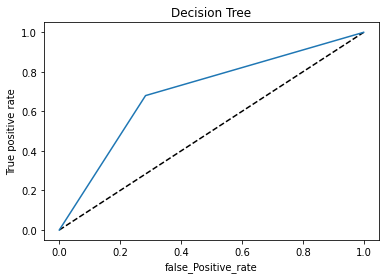

roc_auc_score= 0.6983164871781762


In [23]:
#evaluating r0c_curve and score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false_Positive_rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree')
plt.show()
roc_score=roc_auc_score(y_test,dtc.predict(x_test))
print('roc_auc_score=',roc_score)

Applying random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print('F1_score :',f1_score(y_test,pred))

Accuracy: 0.7789374590700721
F1_score : 0.7688027053636403


lets apply hyperparameter and check the result

In [25]:
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [26]:
random=RandomForestClassifier(n_estimators=500)
random.fit(x_train,y_train)
pred=random.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print('F1_score :',f1_score(y_test,pred))

Accuracy: 0.7835625409299279
F1_score : 0.7743064447289799


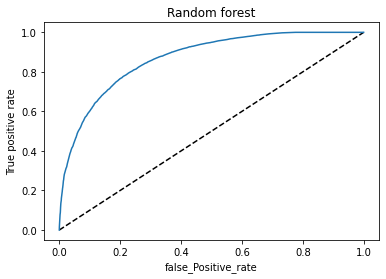

roc_auc_score= 0.7832194766099296


In [27]:
#roc_auc_curve
y_pred_prob=random.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false_Positive_rate')
plt.ylabel('True positive rate')
plt.title('Random forest')
plt.show()
roc_score=roc_auc_score(y_test,random.predict(x_test))
print('roc_auc_score=',roc_score)

In [28]:
#saving the final prediction in dataframe
final_predictions=pred
submission=pd.DataFrame(final_predictions)
submission.rename(columns={0: 'Predicted drug adoption class'}, inplace=True)

In [29]:
submission.head()

,Predicted drug adoption class
0,1
1,0
2,0
3,0
4,1


In [30]:
#importing test data
q3=pd.read_excel('/content/drive/MyDrive/Axtria/Test/Physicians_id.xlsx')
test=pd.DataFrame(q3)
test.head()

,physician_id
0,7
1,9
2,12
3,19
4,20


In [31]:
#as we have to predict for certain physician_id,lets extract those whom are required according to test data
submit=submission.loc[test['physician_id']]

In [32]:
submit

,Predicted drug adoption class
7,0
9,0
12,1
19,0
20,0
...,...
9957,0
9963,1
9982,0
9988,0


In [33]:
#saving the file to csv
submit.to_csv('predictions.csv',index=False)
!cp solution.csv "drive/My Drive/Axtria/"